<a href="https://colab.research.google.com/github/MaralAminpour/IVM_supplementary_materials/blob/main/PCA_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Let's get started on how these neat concepts can be used for dimensionality reduction, especially with Principal Component Analysis (PCA). And guess what? We'll also explore how to practically bring PCA to life using scikit-learn. Excited? Let's jump in!

source: [Linear Algebra for ML Part 2 | Principal Component Analysis](https://www.visual-design.net/post/linear-algebra-for-ml-part2-principal-component-analysis)

## When to Use PCA?

High-dimensional data is a common issue experienced in machine learning practices, as we typically feed a large amount of features for model training. This results in the caveat of models having **less interpretability and higher complexity** - also known as the curse of dimensionality.

<img src='https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-5-Clustering%20and%20Features/imgs/curse.png' width=500px >

PCA can be beneficial when the dataset is high-dimensional (i.e. contains many features) and it is widely applied for dimensionality reduction.

Additionally, PCA is also used for discovering the **hidden relationship among feature variables** and **reveal underlying patterns** that could be very insightful. PCA attempts to find linear components that capture as much variance in the data as possible. And **the first principal component (PC1) is typically composed of features that contributes most to the model predictions.**

## How Does PCA Work?

Think of PCA (Principal Component Analysis) as a way to simplify a lot of data. Here's how it works in simple terms:

1. We try to understand how different parts of our data change together using something called a "covariance matrix."

2. We then find some special directions (called "eigenvectors") where the data changes the most.

3. These special directions help us represent our big, complicated data in a simpler way.

Now, terms like "covariance matrix" and "eigenvector" might sound fancy. But they're just tools to help us see our data in a clearer way. So, instead of thinking about them as tricky math things, picture them as cool visual changes to our data. It makes understanding everything a whole lot easier!

You might remember us chatting about how matrices can be used in math operations, like the dot product. But did you know they can also show us cool visual changes? Let's break it down:

Imagine a 2x2 grid or a tiny chessboard. This is our matrix. If you slice it down the middle, you get two lists (we call them vectors). The list on the left is like our horizontal ruler (x-axis), and the one on the right is our vertical ruler (y-axis). Together, they help create a mini world of a 2D space.

Now, there's a special matrix called the "identity matrix". It has [1,0] for the horizontal ruler and [0,1] for the vertical one. The cool thing about it? If you mix any list (vector) with this special matrix, you get the same list back!


<img src='https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-5-Clustering%20and%20Features/imgs/matrix1.png.webp' width=500px >

Matrix transformation boils down to shifting the scale and direction of the x-axis and y-axis. Imagine the x-axis and y-axis as stretchy rubber bands on a plane. Matrix transformation is like pulling or twisting these bands in different ways.

Let's say you tug the x-axis rubber band to make it twice as long. What you're doing is changing its basic direction from [1,0] to [2,0]. This means everything on that axis gets stretched out and becomes double its original size!

In short, playing around with matrices is like giving a new look to our familiar x and y axes.

<img src='https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-5-Clustering%20and%20Features/imgs/matrix2.png.webp' width=500px >

We can additionally combine both the x-axis and y-axis for more complicated scaling, rotating or shearing transformation. A typically example is the mirror matrix where we swap the x and y axis. For a given vector [1,2], we will get [2,1] after the mirror transformation.

Alright, let's jazz things up a bit. We can play with both the x-axis and y-axis together for some cool effects like stretching, spinning, or even skewing!

Ever played with a mirror? Well, matrices can do something similar. Imagine a matrix that acts like a mirror, flipping the x and y axes. So, if you had a point at [1,2], after using our "mirror" matrix, it'll land at [2,1]. It's like giving the point a fun house mirror effect!

In simple words, with matrices, we can create all sorts of fun and funky changes to our points.

If you would like to practice these transformations in python and skip the manual calculations, we can use following code to perform these dot products and visualize the result of the transformation using plt.quiver() function.

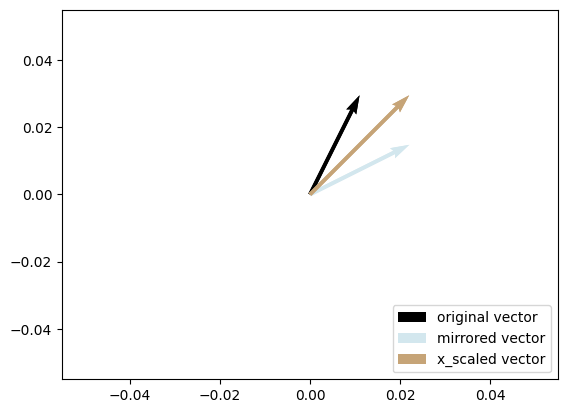

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define matrices and vector
x_scaled_matrix = np.array([[2,0],[0,1]])
mirror_matrix = np.array([[0,1],[1,0]])
v = np.array([1,2])

# matrix transformation
mirrored_v = mirror_matrix.dot(v)
x_scaled_v = x_scaled_matrix.dot(v)

# plot transformed vectors
origin = np.array([[0, 0], [0, 0]])
plt.quiver(*origin, v[0], v[1], color=['black'],scale=10, label='original vector')
plt.quiver(*origin, mirrored_v[0], mirrored_v[1] , color=['#D3E7EE'], scale=10, label='mirrored vector' )
plt.quiver(*origin, x_scaled_v[0], x_scaled_v[1] , color=['#C6A477'], scale=10, label='x_scaled vector')
plt.legend(loc ="lower right")

## Covariance Matrix: The Heartbeat of PCA!

*In Short: covariance matrix represents the pairwise correlations among a group of variables in a matrix form.*

Covariance matrix is another critical concept in PCA process that represents the data variance in the dataset. To understand the details of covariance matrix, we firstly need to know that covariance measures the magnitude of how one random variable varies with another random variable. For two random variable x and y, their covariance is formulated as below and higher covariance value indicates stronger correlation between two variables.

let's chat about something called the "covariance matrix." Think of it as a magical table that tells us how different pieces of our data move together. It's super important for the PCA process because it captures the heartbeat (or variance) of our dataset.

Now, let's break down "covariance" a bit. Imagine you and your friend are dancing. Sometimes you both move in sync, sometimes in opposite directions, and sometimes there's no connection at all in your dance moves. Covariance is like a scorecard that tells you how in-sync (or not) your dance moves are!

If we want to get a bit technical, for two dancers (or random variables) x and y, their dance score (or covariance) can be calculated using a formula. A higher score means you both are more in tune with each other's moves. In data terms, a higher covariance value indicates a stronger connection or correlation between two variables.

<img src='https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-5-Clustering%20and%20Features/imgs/matrix5.png.webp' width=300px >




## Covariance Matrix: The Relationship Checker

When given a set of variables (e.g. x1, x2, ... xn) in a dataset, covariance matrix is typically used for representing the covariance value between each variable pairs in a matrix format.

<img src='https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-5-Clustering%20and%20Features/imgs/matrix6.png.webp' width=400px >


Imagine you have a bunch of friends: x1, x2,... xn. Some of these friends are super close and always hang out together, while others might not get along that well. Now, if you wanted to map out how close each friend is to every other friend, that's where the covariance matrix comes into play!

Think of the covariance matrix as a big chart. Each row and column represents one of your friends. The chart then tells you the "closeness score" between each pair of friends. If x1 and x2 are always together, there'll be a high score in the box where their row and column meet. If they aren't close, the score will be lower.

In simple terms, the covariance matrix helps us see the relationship strength between each pair of variables (or friends) in our dataset. It's like a big friendship chart for data!



## Covariance Matrix: The Trend Magnifier

Multiplying the covariance matrix will transform any vector towards the direction that captures the trend of variance in the original dataset.

let's think of the covariance matrix as a special pair of glasses. When a vector (let's call it a "light beam") passes through these glasses, it gets bent or shifted towards the main trend or direction of our data.

So, if our data has a trend where, let's say, things generally increase, our vector or "light beam" will also point in that increasing direction after passing through our covariance matrix glasses.

In simpler words, multiplying by the covariance matrix is like using a tool that emphasizes the main story or trend in our data. It's helping highlight where most of the action is happening!

Let us use a simple example to simulate the effect of this transformation. Firstly, we randomly generate the variable x0, x1 and then compute the covariance matrix.

In [ ]:
# generate random variables x0 and x1
import random
x0 = [round(random.uniform(-1, 1),2) for i in range(0,100)]
x1 = [round(2 * i + random.uniform(-1, 1) ,2) for i in x0]

# compute covariance matrix
X = np.stack((x0, x1), axis=0)
covariance_matrix = np.cov(X)
print('covariance matrix\n', covariance_matrix)

covariance matrix
 [[0.34249312 0.66848301]
 [0.66848301 1.62123026]]


We then transform some random vectors by taking the dot product between each of them and the covariance matrix.

(-2.5, 2.5)

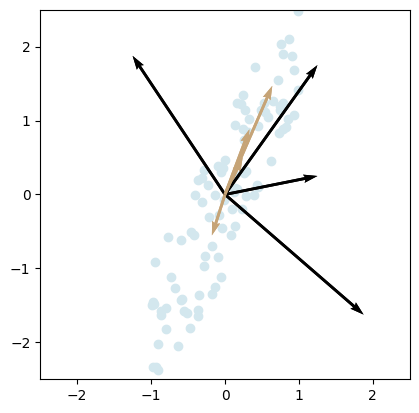

In [ ]:
# plot original data points
plt.scatter(x0, x1, color=['#D3E7EE'])

# vectors before transformation
v_original = [np.array([[1,0.2]]), np.array([[-1,1.5]]), np.array([[1.5,-1.3]]), np.array([[1,1.4]])]

# vectors after transformation
for v in v_original:
    v_transformed = v.dot(covariance_matrix)
    origin = np.array([[0, 0], [0, 0]])
    plt.quiver(*origin, v[:, 0], v[:, 1], color=['black'], scale=4)
    plt.quiver(*origin, v_transformed[:, 0], v_transformed[:, 1] , color=['#C6A477'], scale=10)

plt.axis('scaled')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])

Original vectors prior to transformation are in black, and after transformation are in brown. As you can see, the original vectors that are pointing at different directions have become more conformed to the general trend displayed in the original dataset (i.e. the blue dots). Because of this property, covariance matrix is important to PCA in terms of describing the relationship between features.

Imagine a scatter plot filled with blue dots, representing our original dataset. These dots are scattered, showing various patterns and relationships.

Now, picture a few black arrows (our original vectors) scattered on the same plot. They're pointing in different directions, representing various patterns within the data.

Enter the magic of the covariance matrix!

After passing these black arrows through the transformation of the covariance matrix, they change into brown arrows. These brown arrows now more closely follow the main pattern or trend that the blue dots are showing. Instead of being scattered randomly, they align or "conform" better to the general direction that most of the blue dots are heading towards.

This ability of the covariance matrix to align vectors with the core trends of the data is why it's so crucial in PCA. By understanding and capturing these main trends (or relationships between features), PCA can represent the essence of the data in fewer dimensions, making our analyses more focused and efficient.

So, in essence, the covariance matrix acts like a guide, helping PCA spotlight the major patterns and relationships in the data. It's like turning those scattered black arrows into coordinated brown arrows that march in line with where the data is leading them!

## Eigenvalue and Eigenvector

*In Short: Eigenvector (v) of a matrix (A) remains at the same direction after the matrix transformation, hence Av = λv where v represents the corresponding eigenvalue. Representing data using eigenvector and eigenvalue reduces the dimensionality while maintaining the data variance as much as possible.*

To make this idea clearer, let's look at an easy-to-follow example. Say we have a matrix [[0,1],[1,0]]. One of its special vectors, called an eigenvector, is [1,1], and it has a matching value, known as an eigenvalue, of 1.

<img src='https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-5-Clustering%20and%20Features/imgs/matrix8.png.webp' width=300px >

let's see what's happening with our special matrix: [[0,1],[1,0]]. This matrix is like a magic mirror. When a vector looks into it, its x and y coordinates get swapped around.

Let's use our vector [1,1] as an example. When it looks in this "mirror", its reflection is... itself! The x and y coordinates don't really change. This is why it's a special vector for our matrix, or what we call an "eigenvector".

Now, the "eigenvalue" of 1 is like a size tag. It tells us that our vector, after transformation, remains the same size and points in the same direction. No stretching or squishing happens.

What's super cool is this: instead of using a full-blown matrix to talk about changes, we can use just a single number, the eigenvalue, to summarize the transformation's effect. This eigenvalue is a powerful indicator. It tells us how much of the original data's patterns or "variance" is captured by our eigenvector.

Now, to visualize this, imagine a scatter plot filled with blue dots showing our data spread. Add in our special vector, the eigenvector, as a big red arrow. You'll notice that this red arrow aligns beautifully with the main trend in our data. It's like the backbone, showing where most of the action is happening!

In coding terms, we could use a script to draw this picture, highlighting the dominant eigenvector in vibrant red, revealing its alignment with the data's primary direction or variance. It's all about making the abstract concrete and visual!



In [ ]:
from numpy.linalg import eig
eigenvalue,eigenvector = eig(covariance_matrix)
plt.quiver(*origin, eigenvector[:,1][0], eigenvector[:,1][1] , color=['red'], scale=4, label='eigenvector')

## Principal Components

Making Sense of Data Magic with PCA!

Okay, let’s piece this puzzle together!

1. **Covariance Matrix Magic**: Remember our fancy table, the covariance matrix? It shows how different parts of our data move together. Especially useful when we have lots of variables!

2. **Eigenvectors - The Heroes**: These special vectors (eigenvectors) have a knack for capturing the main patterns in data but in a simpler, less cluttered way.

3. **Eigenvalues - The Power Meters**: Each eigenvector has a buddy called an eigenvalue. This buddy tells us how strong or influential its corresponding eigenvector is.

Now, when we mix the covariance matrix with these eigenvectors and eigenvalues, magic happens!

**Enter Principal Components (PCs)**:
Think of PCs as the all-stars team of eigenvectors. When we calculate the eigenvectors for our covariance matrix, we get these PCs. And just like in sports, there's a ranking!

- **PC1**: The top player. The eigenvector with the highest eigenvalue. This is the one that captures the biggest trends in our data. If our data were a story, PC1 would be the headline!
  
- **PC2, PC3, ... PCn**: The supporting cast. They also capture important patterns but maybe not as prominently as PC1.

Remember that red vector in the image? That's our superstar, PC1. It's showing the main direction where our data has the most action.

**Why Does This Matter?**
Let's say we want a simpler view of our data without losing too much detail. We'd pick the top PCs (like PC1, PC2) because they hold the most information about the original data, thanks to their high eigenvalues.

In short, PCA is like a clever camera that captures the essence of our data using fewer, but super informative, shots!

## PCA Implementation in Machine Learning



## Take-Home Message

In the previous article, we have introduced using linear algebra for data representation in machine learning. Now we introduced another common use case of linear algebra in ML for dimensionality reduction - Principal Component Analysis (PCA). We firstly discussed the theory behind PCA:

1. represent the data variance using covariance matrix

2. use eigenvector and eigenvalue to capture data variance in a lower dimension

3. The principal component is the eigenvector and eigenvalue of the covariance matrix

Furthermore, we utilize scikit-learn to implement PCA through the following procedures:

1. standardize data into the same scale

2. apply PCA on the scaled data

3. visualize explained variance using scree plot

4. interpret the principal components composition

5. use principal components in ML algorithm

**Very intresting article on PCA**

[Are you googling PCA again?](https://lazymodellingcrew.com/post/post_17_are_you_googling_pca_again/)

<img src='https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-5-Clustering%20and%20Features/imgs/beer_vodka.png' width=400px >

